# Strong Scaling Test - CPU

Grid: $n_x\times n_y\times n_z=256^3$

In [1]:
import os, sys
sys.path += ['..']
import plot_tools as pt
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from math import log, log10, sqrt

# more setup
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### funcs

In [2]:
def plot_scaling(scalingX, scaling, figName=None):
    tX = 0.015625*31
    ngrids = 128**3*6
    
    # IdealX
    plt.loglog([i for i in scalingX.dataset[0]],
               [(tX)/(scalingX.dataset[1][0]/3600)*i for i in scalingX.dataset[0]],
               'o--')
    # CarpetX
    plt.loglog([i for i in scalingX.dataset[0]],
               [(tX)/(i/3600) for i in scalingX.dataset[1]],
               'o-')
    
    # Ideal
    plt.loglog([i for i in scaling.dataset[0]],
               [scaling.dataset[1][0]*i for i in scaling.dataset[0]],
               'o--')
    # Carpet
    plt.loglog([i for i in scaling.dataset[0]],
               [i for i in scaling.dataset[1]],
               'o-')

    #plt.yscale('linear')
    plt.xlabel('Num of nodes')
    plt.ylabel('Time units per hour')
    plt.legend(['Ideal-CarpetX','CarpetX','Ideal-Carpet','Carpet'],loc='best')
    
    # fitting
    #scaling_log = pt.ScalingSet(data_OMP28_CarpetX,
    #                            fx=lambda x:log(x),
    #                            fy=lambda y:log((steps*dt)/(y/3600)))
    #scaling_log.fitdata(fit_range=slice(0,-1))
    #plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])
    
    if(figName is not None):
        plt.savefig(figName, bbox_inches='tight')

def set_list(data):
    print(tabulate(data,
               headers=["Nodes","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))
    return data

## BBH

### BBH gcc with $\Delta x = 2$

#### CarpetX

##### 28 OMP

In [3]:
data_OMP28_CarpetX = set_list([
    [1, 268-81],
    [2, 178-63],
    [4, 118-54],
    [8, 90-49],
    [16, 72-47],
    [32, 65-46],
    [64, 62-47],
    [128, 58-47]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |         187 |
|       2 |         115 |
|       4 |          64 |
|       8 |          41 |
|      16 |          25 |
|      32 |          19 |
|      64 |          15 |
|     128 |          11 |


##### 1 OMP

In [4]:
data_OMP1_CarpetX = set_list([
    [1, 233-88],
    [2, 163-77],
    [4, 115-66],
    [8, 92-63],
    [16, 77-62],
    [32, 70-61],
    [64, 263-257],
    [128, 313-308]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |         145 |
|       2 |          86 |
|       4 |          49 |
|       8 |          29 |
|      16 |          15 |
|      32 |           9 |
|      64 |           6 |
|     128 |           5 |


#### Carpet

##### 28 OMP

In [5]:
data_OMP28_Carpet = set_list([
    [1, 41.0880893],
    [2, 58.1454454],
    [4, 63.1192436],
    [8, 89.1549051],
    [16, 97.3126941],
    [32, 95.1713699],
    [64, 100.6411791],
    [128, 99.3218302]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |  41.0880893 |
|       2 |  58.1454454 |
|       4 |  63.1192436 |
|       8 |  89.1549051 |
|      16 |  97.3126941 |
|      32 |  95.1713699 |
|      64 | 100.6411791 |
|     128 |  99.3218302 |


In [6]:
data_OMP28_Carpet_noSubCycling = set_list([
    [1, 9.8880592],
    [2, 11.3202732],
    [4, 18.6873421],
    [8, 28.6755581],
    [16, 37.1579248],
    [32, 36.4116925],
    [64, 39.9068033],
    [128, 42.9660536]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |   9.8880592 |
|       2 |  11.3202732 |
|       4 |  18.6873421 |
|       8 |  28.6755581 |
|      16 |  37.1579248 |
|      32 |  36.4116925 |
|      64 |  39.9068033 |
|     128 |  42.9660536 |


In [7]:
data_OMP28_Carpet_noSubCycling_noBufferZone = set_list([
    [1, 13.9678548],
    [2, 21.4297950],
    [4, 24.7166802],
    [8, 35.1871694],
    [16, 44.0198968],
    [32, 40.0703421],
    [64, 46.5493966],
    [128, 42.8374743]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |  13.9678548 |
|       2 |  21.4297950 |
|       4 |  24.7166802 |
|       8 |  35.1871694 |
|      16 |  44.0198968 |
|      32 |  40.0703421 |
|      64 |  46.5493966 |
|     128 |  42.8374743 |


##### 1 OMP

In [8]:
data_OMP1_Carpet = set_list([
    [1, 113.2021503],
    [2, 162.1042567],
    [4, 215.8381013],
    [8, 282.6668711],
    [16, 309.6852061],
    [32, 350.0680198]
])

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 | 113.2021503 |
|       2 | 162.1042567 |
|       4 | 215.8381013 |
|       8 | 282.6668711 |
|      16 | 309.6852061 |
|      32 | 350.0680198 |


#### Time per hour

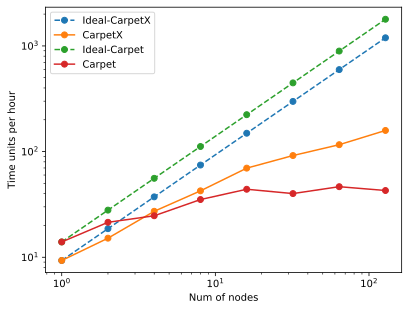

In [9]:
plot_scaling(pt.ScalingSet(data_OMP28_CarpetX), pt.ScalingSet(data_OMP28_Carpet_noSubCycling_noBufferZone), figName='Scaling_BBH_OMP28_dx2_noSC_noBZ.pdf')

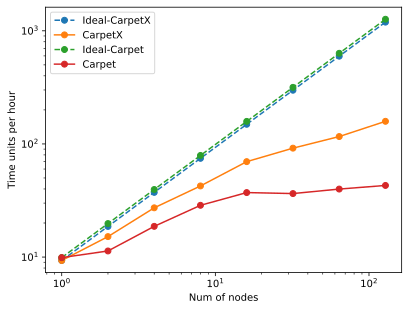

In [10]:
plot_scaling(pt.ScalingSet(data_OMP28_CarpetX), pt.ScalingSet(data_OMP28_Carpet_noSubCycling), figName='Scaling_BBH_OMP28_dx2_noSC.pdf')

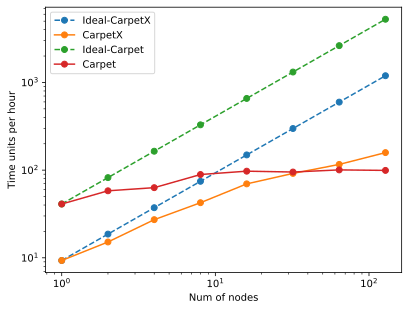

In [11]:
plot_scaling(pt.ScalingSet(data_OMP28_CarpetX), pt.ScalingSet(data_OMP28_Carpet), figName='Scaling_BBH_OMP28_dx2.pdf')

#### Iteration per hour

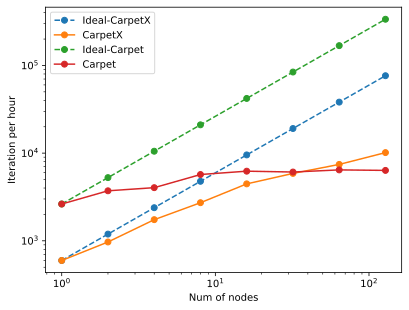

In [9]:
scalingX = pt.ScalingSet(data_OMP28_CarpetX)
scaling = pt.ScalingSet(data_OMP28_Carpet)

TimePerIteration = 0.015625
tX = 31

# IdealX
plt.loglog([i for i in scalingX.dataset[0]],
           [(tX)/(scalingX.dataset[1][0]/3600)*i for i in scalingX.dataset[0]],
           'o--')

# CarpetX
plt.loglog([i for i in scalingX.dataset[0]],
           [(tX)/(i/3600) for i in scalingX.dataset[1]],
           'o-')
#plt.xticks([log(i) for i in scaling.dataset[0]], scaling.dataset[0])

# Ideal
plt.loglog([i for i in scaling.dataset[0]],
           [scaling.dataset[1][0]*i/TimePerIteration for i in scaling.dataset[0]],
           'o--')

# Carpet
plt.loglog([i for i in scaling.dataset[0]],
           [i/TimePerIteration for i in scaling.dataset[1]],
           'o-')


plt.xlabel('Num of nodes')
plt.ylabel('Iteration per hour')
plt.legend(['Ideal-CarpetX','CarpetX','Ideal-Carpet','Carpet'],loc='best')

# fitting
#scaling_log = pt.ScalingSet(data_OMP28_CarpetX,
#                            fx=lambda x:log(x),
#                            fy=lambda y:log((steps*dt)/(y/3600)))
#scaling_log.fitdata(fit_range=slice(0,-1))
#plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])

plt.savefig('./scaling_BBH_OMP28_dx2_IpH.pdf', bbox_inches='tight')

### BBH gcc with $\Delta x=1$

#### CarpetX

In [2]:
data_OMP28_CarpetX = [
    [1, 1252-278],
    [2, 704-166],
    [4, 394-105],
    [8, 235-75],
    [16, 154-61],
    [32, 113-55],
    [64, 88-55],
    [128, 73-50]
]
print(tabulate(data_OMP28_CarpetX,
               headers=["Nodes","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |         974 |
|       2 |         538 |
|       4 |         289 |
|       8 |         160 |
|      16 |          93 |
|      32 |          58 |
|      64 |          33 |
|     128 |          23 |


#### Carpet

In [3]:
data_OMP28_Carpet = [
    [1, 8.7060203],
    [2, 15.0223740],
    [4, 25.5624187],
    [8, 26.8701121],
    [16, 44.2774945],
    [32, 58.7506251],
    [64, 98.5997015]
]
print(tabulate(data_OMP28_Carpet,
               headers=["Nodes","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |   8.7060203 |
|       2 |  15.0223740 |
|       4 |  25.5624187 |
|       8 |  26.8701121 |
|      16 |  44.2774945 |
|      32 |  58.7506251 |
|      64 |  98.5997015 |


#### Carpet with same time steps

In [4]:
data_OMP28_Carpet_samedt = [
    [1, 4.7921454],
    [2, 7.2944567],
    [4, 9.1312910],
    [8, 15.4088797],
    [16, 23.0694351],
    [32, 30.2958259],
    [64, 42.1869833]
]
print(tabulate(data_OMP28_Carpet_samedt,
               headers=["Nodes","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |   4.7921454 |
|       2 |   7.2944567 |
|       4 |   9.1312910 |
|       8 |  15.4088797 |
|      16 |  23.0694351 |
|      32 |  30.2958259 |
|      64 |  42.1869833 |


#### Plot

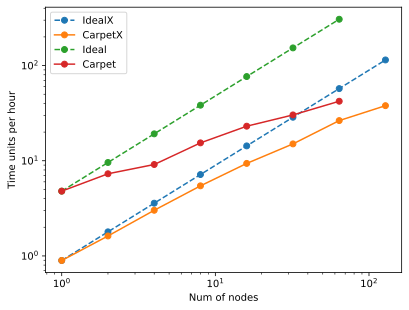

In [5]:
scalingX = pt.ScalingSet(data_OMP28_CarpetX)
scaling = pt.ScalingSet(data_OMP28_Carpet_samedt)

dtX = 0.007812
stepsX = 31

# IdealX
plt.loglog([i for i in scalingX.dataset[0]],
           [(stepsX*dtX)/(scalingX.dataset[1][0]/3600)*i for i in scalingX.dataset[0]],
           'o--')

# CarpetX
plt.loglog([i for i in scalingX.dataset[0]],
           [(stepsX*dtX)/(i/3600) for i in scalingX.dataset[1]],
           'o-')
#plt.xticks([log(i) for i in scaling.dataset[0]], scaling.dataset[0])

# Ideal
plt.loglog([i for i in scaling.dataset[0]],
           [scaling.dataset[1][0]*i for i in scaling.dataset[0]],
           'o--')

# Carpet
plt.loglog([i for i in scaling.dataset[0]],
           [i for i in scaling.dataset[1]],
           'o-')


plt.xlabel('Num of nodes')
plt.ylabel('Time units per hour')
plt.legend(['IdealX','CarpetX','Ideal','Carpet'],loc='best')

# fitting
#scaling_log = pt.ScalingSet(data_OMP28_CarpetX,
#                            fx=lambda x:log(x),
#                            fy=lambda y:log((steps*dt)/(y/3600)))
#scaling_log.fitdata(fit_range=slice(0,-1))
#plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])

plt.savefig('./scaling_BBH_OMP28.pdf', bbox_inches='tight')

### 32-1 Steps BBH icc

In [3]:
data_OMP28 = [
    [1, 1261-286],
    [2, 688-165],
    [4, 391-107],
    [8, 242-79],
    [16, 154-62],
    [32, 116-59],
    [64, 87-53],
    [128, 78-52]
]
print(tabulate(data_OMP28,
               headers=["Nodes","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   Nodes |   Time(sec) |
|---------|-------------|
|       1 |         975 |
|       2 |         523 |
|       4 |         284 |
|       8 |         163 |
|      16 |          92 |
|      32 |          57 |
|      64 |          34 |
|     128 |          26 |


 
0.8053 x - 0.04332


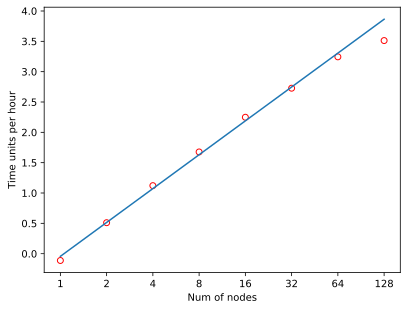

In [4]:
scaling = pt.ScalingSet(data_OMP28)

# plot
plt.plot([log(i) for i in scaling.dataset[0]],
         [log((31*0.007812)/(i/3600)) for i in scaling.dataset[1]],
         linestyle='', marker='o', mfc='none', color='red')
plt.xticks([log(i) for i in scaling.dataset[0]], scaling.dataset[0])
plt.xlabel('Num of nodes')
plt.ylabel('Time units per hour')

# fitting
scaling_log = pt.ScalingSet(data_OMP28,
                            fx=lambda x:log(x),
                            fy=lambda y:log((31*0.007812)/(y/3600)))
scaling_log.fitdata(fit_range=slice(0,-1))
plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])
plt.savefig('./scaling_BH_OMP28.pdf', bbox_inches='tight')

## TOV

### 64-1 Steps

In [2]:
data_MPI = [
    [56, 303-16],
    [112, 169-11],
    [224, 108-7],
    [448, 70-6],
    [896, 43-7],
    [1782, 29-9],
    [3584, 21-9],
    [7168, 18-11],
    [14336, 39-21]
]
print(tabulate(data_MPI,
               headers=["MPI","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   MPI |   Time(sec) |
|-------|-------------|
|    56 |         287 |
|   112 |         158 |
|   224 |         101 |
|   448 |          64 |
|   896 |          36 |
|  1782 |          20 |
|  3584 |          12 |
|  7168 |           7 |
| 14336 |          18 |


 
0.7614 x + 0.3647


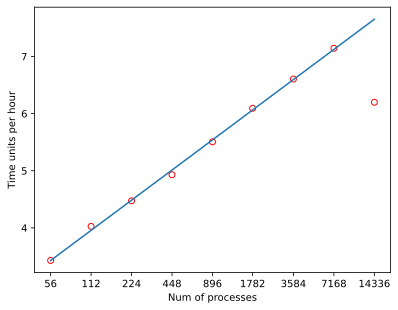

In [4]:
scaling = pt.ScalingSet(data_MPI)

# plot
plt.plot([log(i) for i in scaling.dataset[0]],
         [log((63*0.039062)/(i/3600)) for i in scaling.dataset[1]],
         linestyle='', marker='o', mfc='none', color='red')
plt.xticks([log(i) for i in scaling.dataset[0]], scaling.dataset[0])
plt.xlabel('Num of processes')
plt.ylabel('Time units per hour')

# fitting
scaling_log = pt.ScalingSet(data_MPI,
                            fx=lambda x:log(x),
                            fy=lambda y:log((63*0.039062)/(y/3600)))
scaling_log.fitdata(fit_range=slice(0,-1))
plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])
plt.savefig('./scaling.pdf', bbox_inches='tight')

In [5]:
7168**(1/3)

19.281138113401838

In [7]:
256/19.281138113401838

13.277224533859897

In [8]:
14336**(1/3)

24.292711775005294

In [9]:
256/24.292711775005294

10.538140096133594